PLA6619 Introduction to Urban Data and Informatics I \
Tuesday, October 18, 2022 \
Week07

# Lab 06: GeoPandas and Spatial Analysis

Please __submit__ your lab notebook after the lab session: 

* Run your notebook (you should have at least some outputs)
* `Print` or `export` your notebook __as PDF__ 
* Submit on Canvas

It doesn't need to be perfect, but your submission will be reflected in attendance and participation. The solution of this notebook will be shared by end of today.

## IMPORTANT: Requirements for geospatial analytics in Python
        
* GeoPandas should be installed before running scripts.
* You should be familiar with sptaial data format (e.g. shapefile) and gemoetry.

__Resources:__
* Geopandas technical documentation (official). https://geopandas.org/ 
* Geopandas technical documentation (GitHub). https://github.com/geopandas/geopandas 
* Geopandas tutorial example. https://www.datacamp.com/community/tutorials/geospatial-data-python 


# Load required packages

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import geopandas as gpd # GeoPandas library for spatial analytics
from shapely.geometry import shape

from urllib.parse import urlencode
import urllib.request, json 

import matplotlib.pyplot as plt
import seaborn as sns # visualization styling package
%matplotlib inline 

In [2]:
print(gpd.__version__)

import pyproj 
print(pyproj.__version__)

0.9.0
2.6.1.post1


# PART 1. Intro to GeoPandas
## 1. Load spatial data

    Syntax:
    VARIABLE_NAME = gpd.read_file('YOUR_FILE_PATH')

In [5]:
# Load spatial datasets

# Example data provided by GeoPandas (Polygon data)
nyc_boro = gpd.read_file(gpd.datasets.get_path('nybb'))

# Shapefile (applicable to GeoJSON as well)
#subway_lines = gpd.read_file('C:\Users\LAPTOP\Dropbox\COLUMBIA\CLASSES\URBAN INFORMATICS\Exercises\Lab06')
subway_lines = gpd.read_file('data_export/SubwayLines')

# CSV or JSON (with a geometry information column) and convert to spatial data (Point data)
# If you want to use csv or json format file to convert to spatial data, 
# data should have latitude and longitude information
subway_stations = pd.read_json('https://data.cityofnewyork.us/resource/kk4q-3rt2.json')
subway_stations['the_geom'] = subway_stations['the_geom'].apply(shape)
subway_stations = gpd.GeoDataFrame(subway_stations).set_geometry('the_geom', crs="EPSG:4326")

In [7]:
nyc_boro.head()

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


In [8]:
subway_lines.head()

,id,name,objectid,rt_symbol,shape_len,url,geometry
0,2000393.0,G,753.0,G,2438.200249,http://web.mta.info/nyct/service/,"LINESTRING (-73.99488 40.68020, -73.99427 40.6..."
1,2000394.0,G,754.0,G,3872.834411,http://web.mta.info/nyct/service/,"LINESTRING (-73.97958 40.65993, -73.97966 40.6..."
2,2000469.0,Q,755.0,N,1843.366331,http://web.mta.info/nyct/service/,"LINESTRING (-73.97586 40.57597, -73.97654 40.5..."
3,2000294.0,M,756.0,B,1919.559203,http://web.mta.info/nyct/service/,"LINESTRING (-73.92414 40.75229, -73.92405 40.7..."
4,2000296.0,M,757.0,B,2385.698536,http://web.mta.info/nyct/service/,"LINESTRING (-73.91345 40.75617, -73.90905 40.7..."


In [9]:
subway_stations.head()

,url,objectid,name,the_geom,line,notes
0,http://web.mta.info/nyct/service/,1,Astor Pl,POINT (-73.99107 40.73005),4-6-6 Express,"4 nights, 6-all times, 6 Express-weekdays AM s..."
1,http://web.mta.info/nyct/service/,2,Canal St,POINT (-74.00019 40.71880),4-6-6 Express,"4 nights, 6-all times, 6 Express-weekdays AM s..."
2,http://web.mta.info/nyct/service/,3,50th St,POINT (-73.98385 40.76173),1-2,"1-all times, 2-nights"
3,http://web.mta.info/nyct/service/,4,Bergen St,POINT (-73.97500 40.68086),2-3-4,"4-nights, 3-all other times, 2-all times"
4,http://web.mta.info/nyct/service/,5,Pennsylvania Ave,POINT (-73.89489 40.66471),3-4,"4-nights, 3-all other times"


In [10]:
subway_stations = subway_stations.set_crs('epsg:4326')

## 2. Plot spatial data (with default setting)

* Resource: https://geopandas.org/mapping.html

        Syntax:
        YOUR_GEOPANDAS_DATFRAME.plot()

## 3. Check and convert CRS

    Syntax for checking current CRS:
        YOUR_GEOPANDAS_DATAFRAME.crs
        
    Syntax for a projection:
        YOUR_GEOPANDAS_DATAFRAME.to_crs = "NEW_CRS"
        
__Important notice:__
Depending on a version of GeoPandas and pyproj, you might need a different code. Please refer to this page (https://jorisvandenbossche.github.io/blog/2020/02/11/geopandas-pyproj-crs/) 

In [11]:
print (nyc_boro.crs)
print (nyc_boro.crs.name)
print (nyc_boro.crs.datum)

print (subway_lines.crs)
print (subway_lines.crs.name)
print (subway_lines.crs.datum)

print (subway_stations.crs)
print (subway_lines.crs.name)
print (subway_lines.crs.datum)

epsg:2263
NAD83 / New York Long Island (ftUS)
North American Datum 1983
epsg:4326
WGS 84
World Geodetic System 1984
epsg:4326
WGS 84
World Geodetic System 1984


In [12]:
nyc_boro.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - New York - SPCS - Long Island
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [13]:
subway_lines = subway_lines.to_crs(2263)
subway_stations = subway_stations.to_crs(2263)

In [14]:
print (nyc_boro.crs)
print (subway_lines.crs)
print (subway_stations.crs)

epsg:2263
epsg:2263
epsg:2263


## 4. Plot all spatial data together
* Make sure all data have the same crs
* Colors: https://matplotlib.org/3.1.0/gallery/color/named_colors.html
<img src="https://matplotlib.org/3.1.0/_images/sphx_glr_named_colors_003.png" alt="drawing" width="500"/>
* Colormap types: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

In [15]:
subway_lines['color'] = 'lightgrey'
subway_lines['color'][subway_lines['name'].str.contains("N|Q|R|W", na=False)] = 'Gold'
subway_lines['color'][subway_lines['name'].str.contains("1|2|3", na=False)] = 'Red'
subway_lines['color'][subway_lines['name'].str.contains("4|5|6", na=False)] = 'Green'
subway_lines['color'][subway_lines['name'].str.contains("A|C|E", na=False)] = 'navy'

In [16]:
subway_lines.head(2)

,id,name,objectid,rt_symbol,shape_len,url,geometry,color
0,2000393.0,G,753.0,G,2438.200249,http://web.mta.info/nyct/service/,"LINESTRING (985671.417 187092.953, 985837.975 ...",lightgrey
1,2000394.0,G,754.0,G,3872.834411,http://web.mta.info/nyct/service/,"LINESTRING (989916.745 179707.597, 989894.632 ...",lightgrey


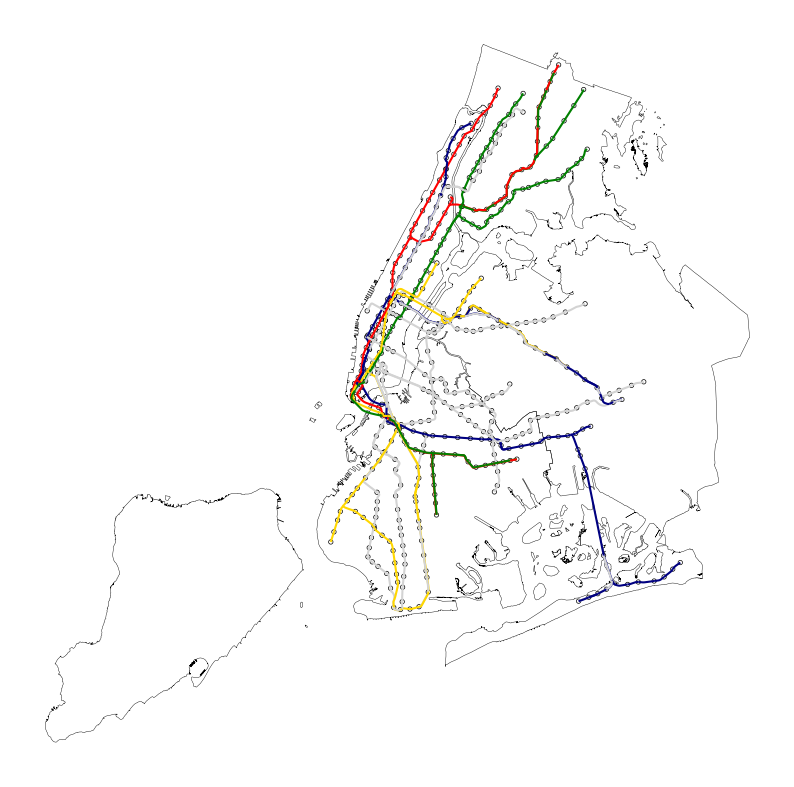

In [17]:
base = nyc_boro.plot(figsize=(10,10), linewidth=0.3, edgecolor='k', facecolor='none')
subway_lines.plot(ax=base, column = 'name', color=subway_lines['color'])
subway_stations.plot(ax=base, markersize = 10, color = 'none', edgecolor='k', linewidth=0.5)

plt.axis(False) #Remove external frame
plt.show()

## 5. Add a background map
### Reqiurement: contextily package (The installation takes some time, so please do it yourself after the class)

    Anaconda Prompt (Windows) or terminal (Mac):
    conda install contextily --channel conda-forge
    
* Resource: https://contextily.readthedocs.io/en/latest/providers_deepdive.html

In [18]:
# Load a package
import contextily as ctx

__List of basemap providers__

    'OpenStreetMap.Mapnik',
    'OpenTopoMap',
    'Stamen.Toner',
    'Stamen.TonerLite',
    'Stamen.Terrain',
    'Stamen.TerrainBackground',
    'Stamen.Watercolor',
    'NASAGIBS.ViirsEarthAtNight2012',
    'CartoDB.Positron',
    'CartoDB.Voyager'

<AxesSubplot:>

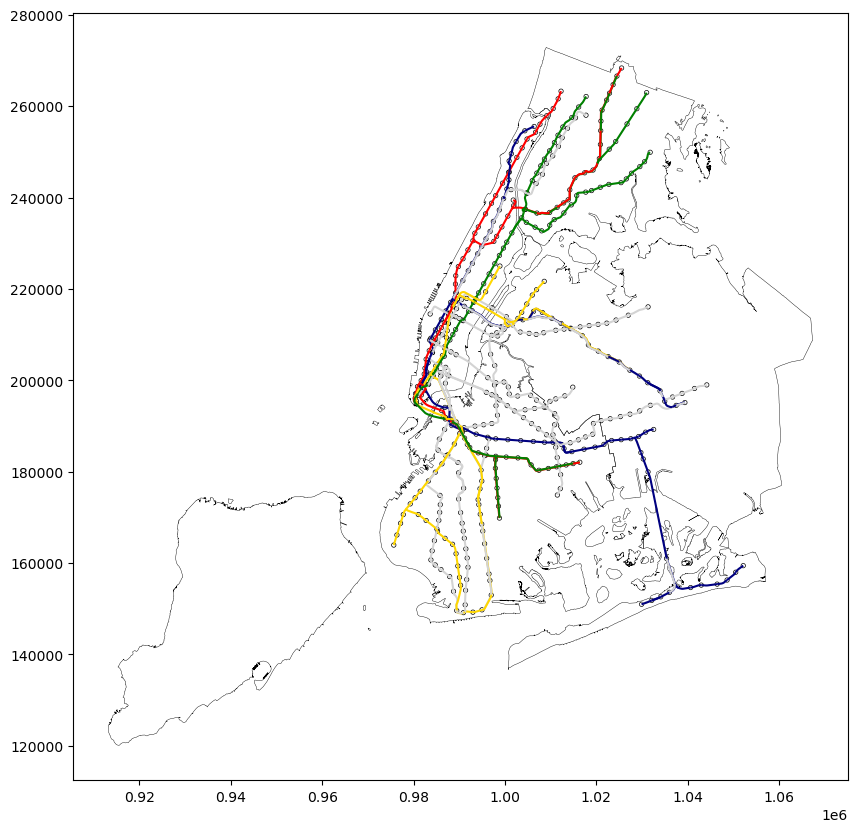

In [19]:
ax = nyc_boro.plot(figsize=(10,10), linewidth=0.3, edgecolor='k', facecolor='none')
subway_lines.plot(ax=ax, column = 'name', color=subway_lines['color'])
subway_stations.plot(ax=ax, markersize = 10, color = 'none', edgecolor='k', linewidth=0.5)

# PART 2. Exploring NYC 311 data (again!)
## 1. Load data from Open API with the following conditions:
* Complaints reported between October 5, 2021 ~ October 11, 2021
* Only 'Illegal Parking' complaint type

In [20]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import geopandas as gpd # GeoPandas library for spatial analytics
from shapely.geometry import shape

from urllib.parse import urlencode
import urllib.request, json 

import matplotlib.pyplot as plt
import seaborn as sns # visualization styling package
%matplotlib inline 

In [21]:
API = 'https://data.cityofnewyork.us/resource/erm2-nwe9.csv?'

# Let's get data for a week (10/08/2022 - 10/14/2022)

query = {'$select': '*',
         '$where': 'created_date>="2022-10-08" and created_date<"2022-10-15" and complaint_type="Illegal Parking"', 
         '$limit': 100000} # if you don't specify 'limit', it returns 1000 rows as default

df = pd.read_csv(API + urlencode(query),
                 parse_dates = ['created_date'],
                 dtype = {'incident_zip':'str'})
print (len(df))
df.head()

8265


,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location
0,55702554,2022-10-14 23:59:59,2022-10-15T02:05:05.000,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11368,59-21 CALLOWAY STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.737582,-73.856826,"\n, \n(40.737581934189215, -73.85682602958292)"
1,55697905,2022-10-14 23:59:34,2022-10-15T00:59:44.000,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11217,357 STATE STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.687765,-73.984892,"\n, \n(40.687764684394566, -73.98489173876638)"
2,55698740,2022-10-14 23:58:44,2022-10-15T01:48:59.000,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11373,52-20 92 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.739185,-73.871134,"\n, \n(40.73918530220479, -73.87113420208536)"
3,55699996,2022-10-14 23:58:15,2022-10-15T04:05:59.000,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10465,2920 SCHLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.824549,-73.819795,"\n, \n(40.824549198221675, -73.81979502208732)"
4,55696135,2022-10-14 23:57:19,2022-10-15T01:44:34.000,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11373,92-07 53 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.738787,-73.870601,"\n, \n(40.73878671476362, -73.87060090679695)"


## 2. Convert Pandas dataframe to GeoPandas dataframe with geometry

In [22]:
from shapely.geometry import Point # this package function is required to create point geometry

In [23]:
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]

gdf = gpd.GeoDataFrame(df, crs='EPSG:4326', geometry=geometry)
gdf.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,geometry
0,55702554,2022-10-14 23:59:59,2022-10-15T02:05:05.000,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11368,59-21 CALLOWAY STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.737582,-73.856826,"\n, \n(40.737581934189215, -73.85682602958292)",POINT (-73.85683 40.73758)
1,55697905,2022-10-14 23:59:34,2022-10-15T00:59:44.000,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11217,357 STATE STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.687765,-73.984892,"\n, \n(40.687764684394566, -73.98489173876638)",POINT (-73.98489 40.68776)
2,55698740,2022-10-14 23:58:44,2022-10-15T01:48:59.000,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11373,52-20 92 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.739185,-73.871134,"\n, \n(40.73918530220479, -73.87113420208536)",POINT (-73.87113 40.73919)
3,55699996,2022-10-14 23:58:15,2022-10-15T04:05:59.000,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10465,2920 SCHLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.824549,-73.819795,"\n, \n(40.824549198221675, -73.81979502208732)",POINT (-73.81980 40.82455)
4,55696135,2022-10-14 23:57:19,2022-10-15T01:44:34.000,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11373,92-07 53 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.738787,-73.870601,"\n, \n(40.73878671476362, -73.87060090679695)",POINT (-73.87060 40.73879)


<AxesSubplot:>

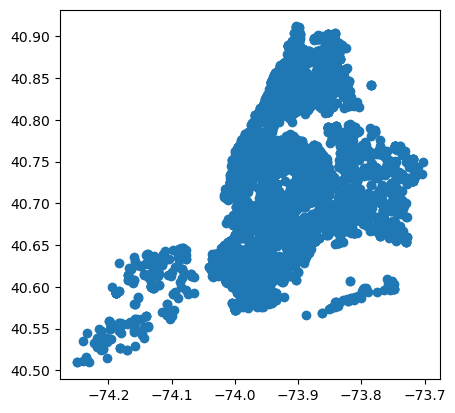

In [24]:
gdf.plot()

## 3. Load NTA data from NYC Open Data

<AxesSubplot:>

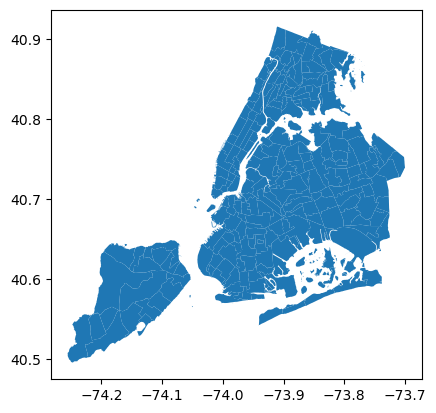

In [25]:
nta = pd.read_json('https://data.cityofnewyork.us/resource/q2z5-ai38.json')
nta['the_geom'] = nta['the_geom'].apply(shape)
nta = gpd.GeoDataFrame(nta, crs="EPSG:4326").set_geometry('the_geom')
nta.plot()

## 4. Spatial Join of two GeoDataFrame
* We would like to add 'nta' information to the illegal parking data.

        Syntax:
        gpd.sjoin(left_df, right_df, how=~, op=~)
        
        op can be one of 'intersect', 'contains', 'within'. Default is 'interset'.
        
* Before conducting spatial join, the point coordinates containing null should be removed.

In [26]:
print (len(gdf))

gdf = gdf[gdf['latitude'].notnull()] #to drop null values
print (len(gdf))

8265
8209


In [29]:
import time
start_time = time.time()

gdf_nta = gpd.sjoin(gdf, nta, how='left')
gdf_nta.head()

print (time.time() - start_time, 'seconds')

0.5035548210144043 seconds


In [30]:
gdf_nta.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,location,geometry,index_right,boro_code,boro_name,county_fips,ntacode,ntaname,shape_leng,shape_area
0,55702554,2022-10-14 23:59:59,2022-10-15T02:05:05.000,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11368,59-21 CALLOWAY STREET,...,"\n, \n(40.737581934189215, -73.85682602958292)",POINT (-73.85683 40.73758),48.0,4.0,Queens,81.0,QN25,Corona,23868.640794,2.007732e+07
1,55697905,2022-10-14 23:59:34,2022-10-15T00:59:44.000,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11217,357 STATE STREET,...,"\n, \n(40.687764684394566, -73.98489173876638)",POINT (-73.98489 40.68776),123.0,3.0,Brooklyn,47.0,BK38,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,32542.684293,2.847648e+07
2,55698740,2022-10-14 23:58:44,2022-10-15T01:48:59.000,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11373,52-20 92 STREET,...,"\n, \n(40.73918530220479, -73.87113420208536)",POINT (-73.87113 40.73919),115.0,4.0,Queens,81.0,QN29,Elmhurst,36647.381446,3.268287e+07
3,55699996,2022-10-14 23:58:15,2022-10-15T04:05:59.000,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10465,2920 SCHLEY AVENUE,...,"\n, \n(40.824549198221675, -73.81979502208732)",POINT (-73.81980 40.82455),89.0,2.0,Bronx,5.0,BX52,Schuylerville-Throgs Neck-Edgewater Park,91304.795136,8.843996e+07
4,55696135,2022-10-14 23:57:19,2022-10-15T01:44:34.000,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11373,92-07 53 AVENUE,...,"\n, \n(40.73878671476362, -73.87060090679695)",POINT (-73.87060 40.73879),115.0,4.0,Queens,81.0,QN29,Elmhurst,36647.381446,3.268287e+07


## 5. Create choropleth maps of illegal parking in the city every 6hours

In [31]:
gdf_nta['date_hour']= gdf_nta['created_date'].dt.round('6h')
gdf_nta[['created_date', 'date_hour']].iloc[2000:2010]

,created_date,date_hour
2016,2022-10-13 10:27:03,2022-10-13 12:00:00
2017,2022-10-13 10:26:36,2022-10-13 12:00:00
2018,2022-10-13 10:26:11,2022-10-13 12:00:00
2019,2022-10-13 10:25:57,2022-10-13 12:00:00
2020,2022-10-13 10:25:37,2022-10-13 12:00:00
2021,2022-10-13 10:25:21,2022-10-13 12:00:00
2022,2022-10-13 10:25:15,2022-10-13 12:00:00
2023,2022-10-13 10:25:12,2022-10-13 12:00:00
2024,2022-10-13 10:23:37,2022-10-13 12:00:00
2025,2022-10-13 10:23:20,2022-10-13 12:00:00


In [32]:
df_311_nta = gdf_nta [['unique_key', 'date_hour', 'ntacode']].groupby(['date_hour', 'ntacode']).count().reset_index()
df_311_nta

,date_hour,ntacode,unique_key
0,2022-10-08,BK17,6
1,2022-10-08,BK21,3
2,2022-10-08,BK25,1
3,2022-10-08,BK28,2
4,2022-10-08,BK29,4
...,...,...,...
3124,2022-10-15,QN76,3
3125,2022-10-15,SI32,1
3126,2022-10-15,SI37,1
3127,2022-10-15,SI48,1


In [34]:
df_311_nta.columns = ['date_hour', 'ntacode', 'illegal_parking_counts']

df_311_nta ['date_hour_str'] = df_311_nta['date_hour'].astype(str)
df_311_nta.head()

,date_hour,ntacode,illegal_parking_counts,date_hour_str
0,2022-10-08,BK17,6,2022-10-08 00:00:00
1,2022-10-08,BK21,3,2022-10-08 00:00:00
2,2022-10-08,BK25,1,2022-10-08 00:00:00
3,2022-10-08,BK28,2,2022-10-08 00:00:00
4,2022-10-08,BK29,4,2022-10-08 00:00:00


<AxesSubplot:>

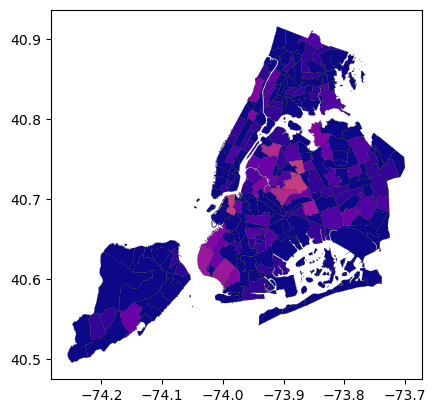

In [35]:
# Sanity check first: 2021-10-05 00am
# If error: conda install -c conda-forge mapclassify
gdf_nta_ip = pd.merge(nta, df_311_nta[df_311_nta['date_hour']=='2022-10-15'], on='ntacode', how='left')
gdf_nta_ip['illegal_parking_counts'] = gdf_nta_ip['illegal_parking_counts'].fillna(0)
ax = gdf_nta_ip.boundary.plot(linewidth=0.2, edgecolor='k', alpha=0.5)
gdf_nta_ip.plot(ax = ax, column='illegal_parking_counts', cmap='plasma', vmax=15)

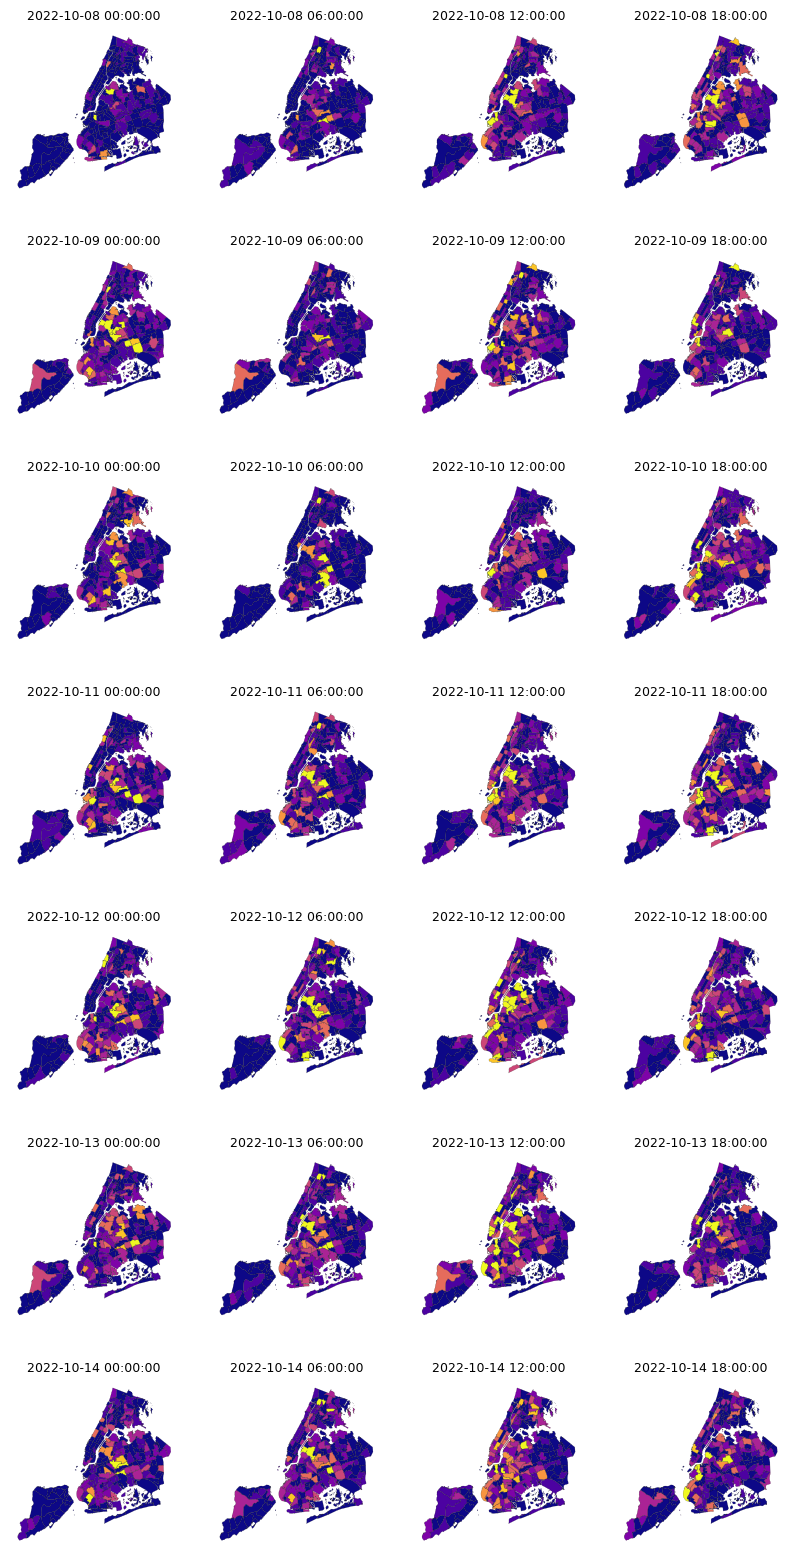

In [36]:
fig, ax = plt.subplots(figsize=(10,20), ncols=4, nrows=7)

i = 0
for d in range(7):
    for h in range(4):
        
        date_hour_list = df_311_nta['date_hour_str'].unique().tolist()

        # Join this table and NTA geometry table
        gdf_nta_ip = pd.merge(nta, df_311_nta[df_311_nta['date_hour_str']==date_hour_list[i]], on='ntacode', how='left')
        gdf_nta_ip['illegal_parking_counts'] = gdf_nta_ip['illegal_parking_counts'].fillna(0)

        # Geography mapping
        mapping = gdf_nta_ip.boundary.plot(ax=ax[d][h], linewidth=0.2, edgecolor='k', alpha=0.5)
        gdf_nta_ip.plot(ax=ax[d][h], column='illegal_parking_counts', cmap='plasma', vmax=8)
        mapping.axis(False)
        mapping.set_title(date_hour_list[i], fontsize=9)
        i += 1        

# plt.savefig('../output/mapping_test.png', dpi=150)
plt.show()

# PART 3: Creating interactive map with Folium
Folium builds on the data wrangling strengths of the Python ecosystem and the mapping strengths of the Leaflet.js library. Manipulate your data in Python, then visualize it in on a Leaflet map via Folium.

__Resource__:https://python-visualization.github.io/folium/modules.html

### Requirement: Folium package
        pip install folium 
        OR
        conda install -c conda-forge folium

In [ ]:
import folium
from folium.plugins import HeatMap